### **Anouncement**

* Don't panic about the midterm, it's going to be fine as long as you know how all previous 3 homework is solved. 
* Late homework is accepted on gradescope. 

### **Matlab**
|Function|Description|
|----|-----|
|[`eig`](https://www.mathworks.com/help/matlab/ref/eig.html), [`eigs`](https://www.mathworks.com/help/matlab/ref/eigs.html)|guarantee the order of eigenvalues/eigenvector pairs.|


### **Python**

|Functio|Description|
|--------------|-------------|
|[`np.linalg.eig`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html)| For large matrices, order is generally respected. For small matrices, this is not gaurenteed. Artifact of the algorithm, not an intentional feature.|
|[`np.linalg.eigh`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eigh.html)|Gaurenteed order, least to greatest (ascending). Good for symmetric matrices! Flip the output to get largest to smallest.|

Function in the scipy modules are also good. 

This is important for the HW, and it will be useful. 

When in doubt, check documentation.



In [26]:
import numpy as np
import scipy.sparse.linalg, scipy.linalg

A = np.random.rand(10, 10)
w, V = np.linalg.eig(A)
print(np.abs(w))


[4.80416028 0.84084209 0.84084209 0.84256028 0.6668286  0.6668286
 0.4928231  0.55815876 0.27202617 0.02349474]


In [27]:
w, V = scipy.sparse.linalg.eigs(A)
print(np.abs(w))
w, V = scipy.linalg.eig(A)
print(np.abs(w))

[4.80416028 0.84256028 0.6668286  0.6668286  0.84084209 0.84084209]
[4.80416028 0.84084209 0.84084209 0.84256028 0.6668286  0.6668286
 0.4928231  0.55815876 0.27202617 0.02349474]


### **Beyond slice notation - subsets**

As on HW3, we wanted a good way to pull out a few columns.
Toy example: a 3x3 matrix, get first and third column. 

**Matlab**

```matlab
cols_to_extract = [1,3];  % Put these integers into a vector
data_matrix = [1,2,3;2,4,6;,3,6,9];  % some simple data
first_and_third = data_matrix(:, cols_to_extract)  % all rows, some cols

```
**Python**

See below. 


In [28]:
cols_to_extract = np.array([0,2])                 # Put these indices into an array
data_matrix = np.array([[1,2,3],[2,4,6],[3,6,9]])  # some simple data
first_and_third = data_matrix[:, cols_to_extract]  # all rows, some cols
print(first_and_third)

[[1 3]
 [2 6]
 [3 9]]


### **Sorting Data using Subset Indexing**

Details of how sorting works left for your CS class(es).
Use built-in methods for sorting data. 
Generally: Compute a sort, store the indexes to obtain sort. Then use the indexes to sort other data.

### **Matlab**
```matlab
x = [1,4,2,3];
[sorted, index] = sort(x);  % get sorted items and reordering vector
new_sorted = x(index);  % can use this to apply the reordering
```



In [29]:
x = np.asarray([1,4,2,3])
index_array = np.argsort(x)
sorted = x[index_array]   # sorts along an axis
print(sorted)
print(index_array)

[1 2 3 4]
[0 2 3 1]


## **Sorting matrices - it's really about index notation**
Continue examples from previous slide
### **Matlab**
```matlab
x = [1,4,2,3];
y = magic(4);
[sorted, index] = sort(x);  % get sorted items and reordering vector
new_sorted = x(index)  % can use this to apply the reordering
z = y(:, index)  % preserves row order, only reorder columns
```

In [30]:
### Python

x = np.asarray([1,4,2,3])
y = np.arange(16).reshape(4,4)
index_array = np.argsort(x)
print(index_array)
sorted = x[index_array]    # sorts along an axis, row, first axis. 
z = y[:, index_array]



[0 2 3 1]


## **Debugging**

We are going o look at some code and see where are the errors. 

### **Debugging Example 1: Matrix Operations**

Matrix multiplication

$$
A = \left[ \begin{array}{cc} 1 & 2 \\ 2 &1\end{array}\right],~~
B = \left[ \begin{array}{cc} -1.001 & 1\\ 1 & 1\end{array}\right],~~
C = \left[ \begin{array}{c} -1 & 0\\ 0 & -3\end{array}\right]
$$

Compute $AB - BC$.

**matlab code:**

```matlab
A = [1,2;2,1]; 
B = [-1, 1;1,1]; 
C = [-1,0;0,-3];
result = A*B - B*C;
```

**Python code** in the cell

**Question:** What is the bug here? 

<details>
<summary>Answer</summary>
    <par>
        The element in the matrix is not copied correctly.
    </par>
</details>


In [31]:
A = np.asarray([[1,2],[2,1]]); 
B=np.asarray([[-1,1],[1,1]])
C = np.asarray([[-1,0],[0,3]])
result = A@B - B@C

**Example 2: More Matrix Opreations**

$$
A = \left[ \begin{array}{cc} 1 & 2 \\ 2 &1\end{array}\right],~~
B = \left[ \begin{array}{cc} -1.001 & 1\\ 1 & 1\end{array}\right],~~
c = \left[ \begin{array}{c} -1 & 0\\ 0 & 3\end{array}\right]
$$
Compute $A^TB - CB$.

**Matlab code:**

```matlab
A = [1,2;2,1]; 
B = [-1.001, 1;1,1]; 
C = [-1,0;0,3];
result = A.'*B - B*C;
```

**Python:** code in the cell

**Question:** What is the bug here? 


<details>
<summary>answers</summary>
<par>
    The order of the multiplications shouldn't be swapped. Should be $CB$ instead of $BC$. 
</par>
</details>


In [32]:
A = np.asarray([[1,2],[2,1]]); B=np.asarray([[-1.001,1],[1,1]])
C = np.asarray([[-1,0],[0,3]])
result = A.T@B - B@C

**Example 3: Matrix Oprations, Python Exclusive**

$$
A = \left[ \begin{array}{cc} 1 & 2 \\ 2 &1\end{array}\right],~~
B = \left[ \begin{array}{cc} -1.001 & 1\\ 1 & 1\end{array}\right],~~
c = \left[ \begin{array}{c} -1 & 0\\ 0 & 3\end{array}\right]
$$
Compute $AB$

**Python** code in the cell. 

**Question**: What is the bug here? 

<details>
    <summary>
        Asnwers
    </summary>
    <par>
        It's using python native array instead of using numpy array. 
    </par>
<details>

In [33]:
A = np.array([[1, 2], [2, 1]])
B = np.array([[-1.001, 1], [1, 1]])
A@B

array([[ 0.999,  3.   ],
       [-1.002,  3.   ]])

**Example 4: Matrix Oprations, Python Exclusive**

$$
A = \left[ \begin{array}{cc} 1 & 2 \\ 2 &1\end{array}\right],~~
B = \left[ \begin{array}{cc} -1.001 & 1\\ 1 & 1\end{array}\right],~~
c = \left[ \begin{array}{c} -1 & 0\\ 0 & 3\end{array}\right]
$$
Compute $AB$

**Python code in the cell**

**Question**: What is the bug here?

<details>
    <summary>
        Answers
    </summary>
    <par>
        In python, for matrix opertaions as in the linear algebra sense, we should be using the `@`  operator instead of the `*` which does elementwise operations.
    </par>
</details>

In [34]:
A = np.array([[1, 2], [2, 1]])
B = np.array([[-1.001, 1], [1, 1]])
A*B

array([[-1.001,  2.   ],
       [ 2.   ,  1.   ]])

**Jacobi Iterations**

We are going to Jacobi Iteration and this is the system we are trying to solve: 

$$
Ax = b\quad A = \begin{bmatrix}
5 & 2 \\ -1 & 3
\end{bmatrix}
\quad 
b = \begin{bmatrix}
3 \\ 2
\end{bmatrix}
$$

Firstly, let's compute the correct solutions for the system




In [35]:
A = np.array([[5, 2], [-1, 3]])
b = np.array([[3], [2]])
x = np.linalg.solve(A, b)
print(x)

[[0.29411765]
 [0.76470588]]


### **Example 5: Jacobi Iteration**

This is the system we are trying to solve: 
$$
Ax = b\quad A = \begin{bmatrix}
5 & 2 \\ -1 & 3
\end{bmatrix}
\quad 
b = \begin{bmatrix}
3 \\ 2
\end{bmatrix}
$$

**This is the Matlab code that tries to solve this:**


```matlab
solution_guess = zeros(1,2)
for step=1:5
    new_guess = zeros(1,2)
    new_guess(1) = (3 - 2 * solution_guess(2)) / 5
    new_guess(2) = (2 - (-1) * solution_guess(1)) / 3
end
A2 = new_guess
```

And this is the python code that is trying to solve this:

**Question**: What is the bug here? 

<details>
<summary>Answer</summary>
<par>
    There is no update for the solution inside of the forloop.  `solution_guess` should be updated inside of the forloop.
</par>
</details>


In [36]:
solution_guess = np.zeros(2)
for step in range(5):
    new_guess = np.zeros(2)
    new_guess[0] = (3 - 2 * solution_guess[1]) / 5
    new_guess[1] = (2 - (-1) * solution_guess[0]) / 3
    
A2 = new_guess
print(A2)
print(x)

[0.6        0.66666667]
[[0.29411765]
 [0.76470588]]


### **Example 6: Jacobi Iteration**

This is the system we are trying to solve: 
$$
Ax = b\quad A = \begin{bmatrix}
5 & 2 \\ -1 & 3
\end{bmatrix}
\quad 
b = \begin{bmatrix}
3 \\ 2
\end{bmatrix}
$$

**This is the Matlab code that tries to solve this:**

```matlab
SolutionGuess = zeros(1, 2);
for step = 1:5
    NewGuess = zeros(1, 2);
    NewGuess(1) = (2 - 2*SolutionGuess(2))/5; 
    NewGuess(2) = (2 - (-1)*SolutionGuess(1))/3
    SolutionGuess = NewGuess
end
A2 = NewGuess
```

**Python** code in the cell below. 

**Question**: What is the bug? 

<details>
<summary>
    Answers
</summary>
<par>
    There is a type when copying the b vector and transferring it into code. 
</par>
</details>




In [37]:
SolutionGuess = np.zeros(2)
for step in range(10): 
    NewGuess = np.zeros(2)
    NewGuess[0] = (2 - 2*SolutionGuess[1])/5
    NewGuess[1] = (2 - (-1)*SolutionGuess[0])/3
    SolutionGuess = NewGuess
A2 = NewGuess
print(A2)
print(x)

[0.11765202 0.7059121 ]
[[0.29411765]
 [0.76470588]]


### **Example 7: Jacobi Iteration (Python Exclusive)**

This is the system we are trying to solve: 

$$
Ax = b\quad A = \begin{bmatrix}
5 & 2 \\ -1 & 3
\end{bmatrix}
\quad 
b = \begin{bmatrix}
3 \\ 2
\end{bmatrix}
$$

**Python** code is below in the cell: 

**Question**: What is the bug here? 

<details>
<summary>
    Answers
</summary>
<par>
    There is something wrong with the header of the forloop. 
</par>
</details>

In [38]:
solution_guess = np.zeros(2)
for step in range(2,20):
    new_guess = np.zeros(2)
    new_guess[0] = (3 - 2 * solution_guess[1]) / 5
    new_guess[1] = (2 - (-1) * solution_guess[0]) / 3
    solution_guess = new_guess
A2 = new_guess
A2

array([0.29411765, 0.76470589])

### **Example 8: If Statement and Las Vegas Algorithm. (Matlab Exclusive)**

**Objective**

We are tasked with generating a random vector (column vector, with 3 element ), Where all the element in the vector is larger than 0.5 using [Las Vegas Algortihm](https://en.wikipedia.org/wiki/Las_Vegas_algorithm). 

**Matlab Code** 

```matlab
while 1 
    x = rand(3, 1); 
    if x(1) && x(2) && x(3) > 0.5
        break;
    end
end
```

**Question**: Where is the bug in the code? 

<details>
    <summary>
        Answers
    </summary>
    <par>
        We can't write if statememnt like that in the while loop. To make sure all elements are satisfying the condition of less than `0.5`, we need to write: 
    </par>
    
    ```matlab
        while 1 
            x = rand(3, 1);
            if x(1) > 0.5 && x(2) > 0.5 && x(3) > 0.5
                break;
            end
        end
    ```
</details>

### **Exercise: PCA and Principal Components Projections**

Mathematical Facts: 
Suppoes the Matrix $X$, has singular value decomposition. (It always has by the way. ) Then: 

* The eigenvectors of the matrix $XX^T$ *can* have the same vectors  as the vectors in $U$ where $U\Sigma V^T$ serves as the SVD decomposition of the matrix $X$. (Note, they will be differred by a multiple of -1). 
* The squared of the Singular Values of the matrix $X$ is the same as the eigen values of the matrix $XX^T$.
* The first few (Depends on the shape of the matrix $X$) eigen values of the matrix $XX^T$ and $X^TX$ is the same. (Which links back to the first statement)

**Question**: What are the principal components of the data matrix $X$? We assume it's a column data matrix. 

**Question**: How is the variance of the singular value $\sigma_j$ computed? 

<details>
    <summary>
        Answers
    </summary>
    
In this case, the principal components refers to the columns from the matrix $U$, from the Singular Value Decomposition of the matrix $X$.

The Variance is computed as 

$$
\frac{\sigma_j}{\sum_{i = 1}^{n} \sigma_i}
$$

Note that the denominators are all the singular values, which are the diagonal of the matrix $\Sigma$ from the singular value decomposition. In addition, if it's asking for the percentage of the variance on each of the singular values, we will have to multiply the quantity by 100. 
    
</details>

Let's verify some of the statement using code. 


Verifies that the eigenvalues of the matrix $XX^T$ is the same compare to columns of the matrix $U$ from SVD up to a -1 multiplier. 

In [42]:
X = np.random.rand(1024, 20) # A skinny matrix storing big data, but few of them.
C1 = X@X.T
C2 = X.T@X

U, sigmas, Vh = np.linalg.svd(X, full_matrices=False)  # We don't need a full decomposition, we only need the first 20 singular values, that is what the "full_matrices=false" is for. 
EigenValuesC1, EigenvectorsC1 = scipy.sparse.linalg.eigs(C1)  # Will give you the first 6 eigenvalues and corresponding eigen vectors ordered by their absolute value. 
Diff1 = np.abs(U[:, :5]) -  np.abs(EigenvectorsC1[:, :5])

# Let's get the maximal absolute value for element in Diff1: 
np.max(abs(Diff1))
# The error here should be small, confirming that they are getting vectors very cloes to each other. 


7.639722188201858e-15

Let's also plot out the differences and see how they are distributed. 

Plase Pay attention to the scale of the x-axis.


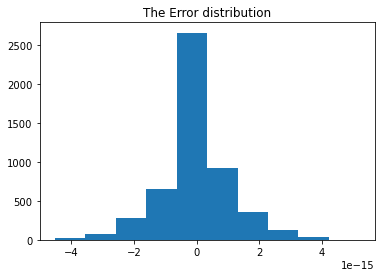

In [40]:
import matplotlib.pyplot as plt  
Diff1 = Diff1.reshape(-1)
plt.hist(Diff1)
plt.title("The Error distribution")
print("Plase Pay attention to the scale of the x-axis.")


Let's verify the fact that the Singular Value squared is the same as the eigenvalues of C1 matrix, or the C2 Matrix. 

In [47]:
SingularValueSquared = sigmas**2
display(SingularValueSquared[:6])
display(EigenValuesC1[:6])
# The difference can be computed by: 
Diff2 = SingularValueSquared[:6] - EigenValuesC1[:6]
print(np.max(np.abs(Diff2)))
# Observe the small size of the errors. 

array([5196.64229129,  108.28047996,  103.13255811,  101.28812425,
         99.4288025 ,   94.12566512])

array([5196.64229129+0.j,  108.28047996+0.j,  103.13255811+0.j,
        101.28812425+0.j,   99.4288025 +0.j,   94.12566512+0.j])

9.094947017729282e-13


Let's verify the fact that the eigenvalues for the matrix $XX^T$ is the same as the matrix $X^TX$. 

In [52]:
EigenvaluesC2, _ = scipy.sparse.linalg.eigs(C2)
display(EigenvaluesC2)
display(EigenValuesC1)
# the maximal absolute difference is given as: 
display(np.max(np.abs(EigenValuesC1 - EigenvaluesC2)))
# Observe the smallness of the difference. 

array([5196.64229129+0.j,  108.28047996+0.j,  103.13255811+0.j,
        101.28812425+0.j,   99.4288025 +0.j,   94.12566512+0.j])

array([5196.64229129+0.j,  108.28047996+0.j,  103.13255811+0.j,
        101.28812425+0.j,   99.4288025 +0.j,   94.12566512+0.j])

4.547473508864641e-12